<a href="https://colab.research.google.com/github/AbdulMoiz-MMY/Agentic_AI_Learning/blob/main/Langchain_Hlo_wrd__Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
from google.colab import userdata

GEMINI_API_KEY = userdata.get("GOOGLE_API_KEY")

In [12]:
!pip install -q -U langchain

In [13]:
!pip install -q -U langchain.google_genai

In [14]:
from langchain_google_genai import ChatGoogleGenerativeAI
from langchain.prompts import PromptTemplate

In [15]:
First_prompt = PromptTemplate(
    input_variables = ["question"],
    template = "the key points of {question} in a clear and concise manner, focusing on the most important details. ",
)

Second_prompt = PromptTemplate(
    input_variables = ["first_response"],
    template = "read this {first_response} and summarize into Two lines promt for  relate image generation?",
)

Third_prompt = PromptTemplate(
    input_variables = ["second_response"],
    template = "generate the image {second_response} ?",
)


In [19]:
llm = ChatGoogleGenerativeAI(
    api_key = GEMINI_API_KEY,
    model = "gemini-1.5-flash",
    temperature = 0.5,
    max_output_tokens = 65

)

In [20]:
first_chain = First_prompt | llm
second_chain = Second_prompt | llm


In [21]:
import torch
from diffusers import StableDiffusionPipeline # Changed from StableDiffusion3Pipeline


In [23]:

first_response = first_chain.invoke({"question": input("Write the Question ?")})
print("First Chain",first_response.content)
second_response = second_chain.invoke({"first_response":first_response.content})
print("Second Chain ", second_response.content)

print()
print("Generate Image ")

# ... (rest of your code) ...

pipe = StableDiffusionPipeline.from_pretrained(
    "CompVis/stable-diffusion-v1-4",) # Using the correct pipeline class for v1.4
if torch.cuda.is_available():
  pipe = pipe.to("cuda")

# ... (rest of your code) ...
image = pipe(second_response.content).images[0]

image.save("Find_generate_image.png")
print("Image Generate and saved as 'Find_generate_image.png'")


Write the Question ?learn about MAchine Learning
First Chain Machine learning (ML) is about building systems that learn from data without explicit programming.  Here are the key points:

* **Goal:** To create algorithms that allow computers to learn patterns, make predictions, and improve their performance over time based on data.

* **Types:**
    * **Supervised Learning:**
Second Chain  Machine learning enables computers to learn from data without explicit instructions, creating algorithms that predict and improve over time.  This is relevant to image generation by training models on vast datasets of images to learn patterns and generate new, realistic images.


Generate Image 


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Image Generate and saved as 'Find_generate_image.png'


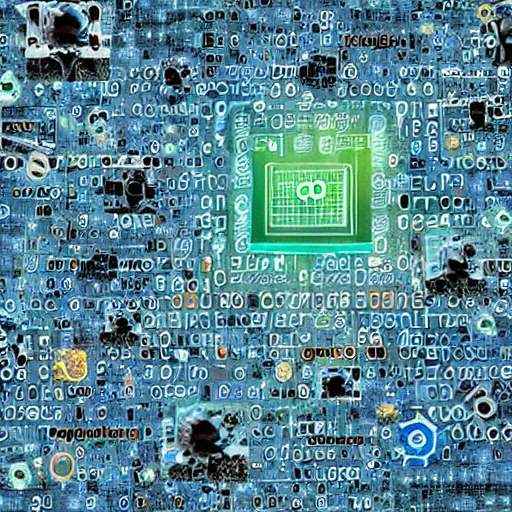

In [24]:
image